In [2]:
import matplotlib.pyplot as plt
import torch

In [4]:
sensitivity=torch.load("../cache/facebook_opt-125m_sensitivity.pt")

In [7]:
sensitivity.keys()

dict_keys(['lm_head', 'model.decoder.layers.11.fc1', 'model.decoder.layers.11.fc2', 'model.decoder.layers.11.self_attn.k_proj', 'model.decoder.layers.11.self_attn.v_proj', 'model.decoder.layers.11.self_attn.q_proj', 'model.decoder.layers.11.self_attn.out_proj', 'model.decoder.layers.10.fc1', 'model.decoder.layers.10.fc2', 'model.decoder.layers.10.self_attn.k_proj', 'model.decoder.layers.10.self_attn.v_proj', 'model.decoder.layers.10.self_attn.q_proj', 'model.decoder.layers.10.self_attn.out_proj', 'model.decoder.layers.9.fc1', 'model.decoder.layers.9.fc2', 'model.decoder.layers.9.self_attn.k_proj', 'model.decoder.layers.9.self_attn.v_proj', 'model.decoder.layers.9.self_attn.q_proj', 'model.decoder.layers.9.self_attn.out_proj', 'model.decoder.layers.8.fc1', 'model.decoder.layers.8.fc2', 'model.decoder.layers.8.self_attn.k_proj', 'model.decoder.layers.8.self_attn.v_proj', 'model.decoder.layers.8.self_attn.q_proj', 'model.decoder.layers.8.self_attn.out_proj', 'model.decoder.layers.7.fc1', 

/tmp/ipykernel_136830/674680634.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


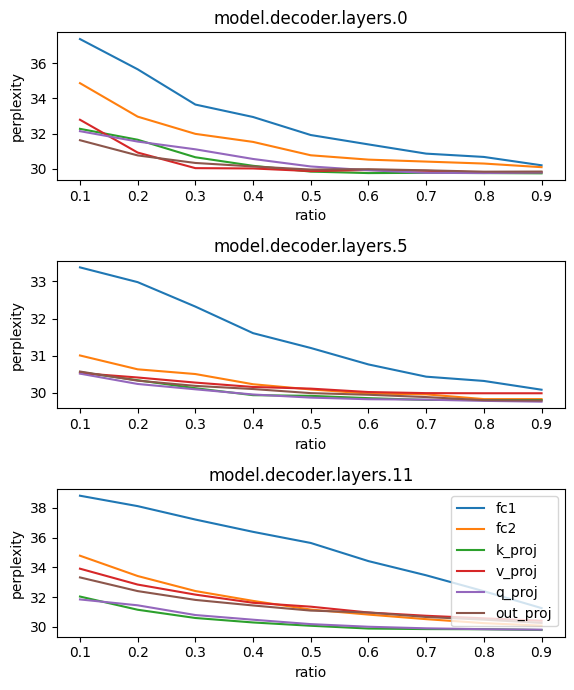

In [30]:
fig=plt.figure(figsize=(6,7))
for layeri, l in enumerate([0,5,11]):
    layer_pre="model.decoder.layers."+str(l)
    ax=fig.add_subplot(3,1,layeri+1)
    ax.set_xlabel("ratio")
    ax.set_ylabel("perplexity")
    ax.set_title(layer_pre)
    # tight layout to avoid overlap
    plt.tight_layout()

    for name, ss in sensitivity.items():
        if layer_pre in name:
            data=[]
            for ratio,ppl in ss.items():
                data.append((ratio,ppl))

            ax.plot([x[0] for x in data],[x[1] for x in data],label=name.split(".")[-1])
ax.legend(loc='upper right')
plt.show()
# save pdf
import os
if not os.path.exists("../plots"):
    os.makedirs("../plots")
fig.savefig("../plots/sensitivity.pdf",bbox_inches='tight')
